<a href="https://colab.research.google.com/github/jeayoon/kaggle_jy/blob/master/fashion_mnist_jy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

Using TensorFlow backend.


In [0]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import models
from keras.models import Model
from keras import Input
from keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
# 学習中の検証データがないので、train_test_split()を使って学習データ8割、検証データを2割に分割する。test_sizeが検証データの割合になっている。
_x_train, _x_test, _y_train, _y_test = train_test_split(x_train, y_train, test_size=0.2)

In [8]:
print("x_train   : ", _x_train.shape) # x_train   :  (48000, 28, 28)
print("y_train   : ", _y_train.shape) # y_train   :  (48000,)
print("x_test    : ", _x_test.shape) # x_test    :  (10000, 28, 28)
print("y_test    : ", _y_test.shape) # y_test    :  (10000,)

x_train   :  (48000, 28, 28)
y_train   :  (48000,)
x_test    :  (12000, 28, 28)
y_test    :  (12000,)


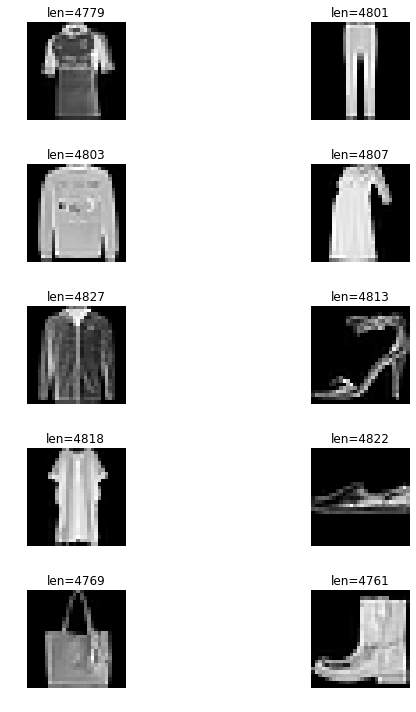

In [9]:
plt.figure(figsize=(10,10))

# MNISTの0から9の画像をそれぞれ表示する。
for i in range(10):
    data = [(x,t) for x, t in zip(_x_train, _y_train) if t == i]
    x, y = data[0]

    plt.subplot(5,2, i+1)
    # plt.title()はタイトルを表示する。ここでは画像枚数を表示している。
    plt.title("len={}".format(len(data)))
    # 画像を見やすいように座標軸を非表示にする。
    plt.axis("off")
    plt.imshow(x, cmap='gray')

plt.tight_layout()
plt.show()

In [0]:
# 学習、検証、テストデータの前処理用関数。
def preprocess(data, label=False):
    if label:
        # 教師データはto_categorical()でAQQQWQAQEEEEEË5RFRFDSZする。
        data = to_categorical(data)
    else:
        # 入力画像は、astype('float32')で型変換を行い、レンジを0-1にするために255で割る。
        # 0-255 -> 0-1
        data = data.astype('float32') / 255
        # Kerasの入力データの形式は(ミニバッチサイズ、横幅、縦幅、チャネル数)である必要があるので、reshape()を使って形式を変換する。
        # (sample, width, height) -> (sample, width, height, channel)
        data = data.reshape((-1, 28, 28, 1))

    return data